In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
engine = create_engine(
    "mssql+pyodbc://@localhost\\SQLEXPRESS/SuperstoreDB"
    "?driver=ODBC+Driver+17+for+SQL+Server"
    "&trusted_connection=yes"
)
df_head = pd.read_sql("SELECT Top 5 * FROM Superstore", engine)
df_head

c:\Users\vista\anaconda3\Lib\site-packages\pandas\io\sql.py:1636: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  con = self.exit_stack.enter_context(con.connect())


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [ ]:
query="""
SELECT 
    COLUMN_NAME,
    DATA_TYPE
FROM INFORMATION_SCHEMA.COLUMNS
"""
df_columns=pd.read_sql_query(query,engine)
df_columns

In [ ]:
query="""
SELECT COUNT(*) AS total_rows
FROM superstore;
"""
df_shape =pd.read_sql_query(query,engine)
df_shape 


In [ ]:
query="""
SELECT
    COLUMN_NAME,
    DATA_TYPE
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'superstore';
"""
df_info=pd.read_sql_query(query,engine)
df_info


In [ ]:
query="""
SELECT
    COUNT(Sales) AS count_sales,
    AVG(Sales)   AS mean_sales,
    MIN(Sales)   AS min_sales,
    MAX(Sales)   AS max_sales
FROM superstore;
"""
df_describe=pd.read_sql_query(query,engine)
df_describe


In [ ]:
query="""
SELECT
    SUM(CASE WHEN Order_Date IS NULL THEN 1 ELSE 0 END) AS order_date_nulls,
    SUM(CASE WHEN Ship_Date IS NULL THEN 1 ELSE 0 END) AS ship_date_nulls,
    SUM(CASE WHEN Sales IS NULL THEN 1 ELSE 0 END) AS sales_nulls
FROM superstore;
"""
df_null=pd.read_sql_query(query,engine)
df_null

In [ ]:
query = """
SELECT Category, SUM(Sales)  AS total_sales
FROM [dbo].[Superstore]
GROUP BY Category
ORDER BY total_sales DESC;
"""
df_cat = pd.read_sql(query, engine)  # conn = SQL connection
fig , axes=plt.subplots(1,2,figsize=(16,6))
sns.barplot(data=df_cat,x='Category',y='total_sales',ax=axes[0],palette='Set1')
axes[0].set_title('Sales by Category')
axes[0].grid(True, alpha=0.1)
query = """
SELECT Category, SUM(Profit)  AS total_profit
FROM [dbo].[Superstore]
GROUP BY Category
ORDER BY total_profit DESC;
"""
df_cat = pd.read_sql(query, engine) 
sns.barplot(data=df_cat,x='Category',y='total_profit',ax=axes[1],palette='Set1')
axes[1].set_title('Profit by Category')
axes[1].grid(True, alpha=0.3)

In [ ]:
query = """
SELECT month(Order_Date) as month, SUM(sales)  AS total_sales
FROM [dbo].[Superstore]
GROUP BY Order_Date
ORDER BY total_sales DESC;
"""
df_cat = pd.read_sql(query, engine) 
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(data=df_cat,x='month',y='total_sales',markers='o',linewidth=2,ax=axes[0])
axes[0].set_title('Sales by month')
axes[0].grid(True, alpha=0.3)
query = """
SELECT year(Order_Date) as year, SUM(sales)  AS total_sales
FROM [dbo].[Superstore]
GROUP BY Order_Date
ORDER BY total_sales DESC;
"""
df_cat = pd.read_sql(query, engine) 
sns.barplot(data=df_cat,x='year',y='total_sales',ax=axes[1],palette='Set2')
axes[1].set_title('Sales by year')
axes[1].grid(True, alpha=0.3)

In [ ]:
query="""
   select region , sum(sales) as total_sales
   from [dbo].[Superstore]
   group by region 
   order by total_sales desc
"""
Region_sales=pd.read_sql_query(query,engine)
Region_sales
sns.barplot(data=Region_sales,x='region',y='total_sales',palette='tab10')
plt.grid(True,alpha=0.3)
plt.title('Region Sales Distribution')

C:\Users\vista\AppData\Local\Temp\ipykernel_10316\1650751186.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Region_sales,x='sub_category',y='total_sales',palette='tab10')


Text(0.5, 1.0, 'Sub_Category Sales Distribution')

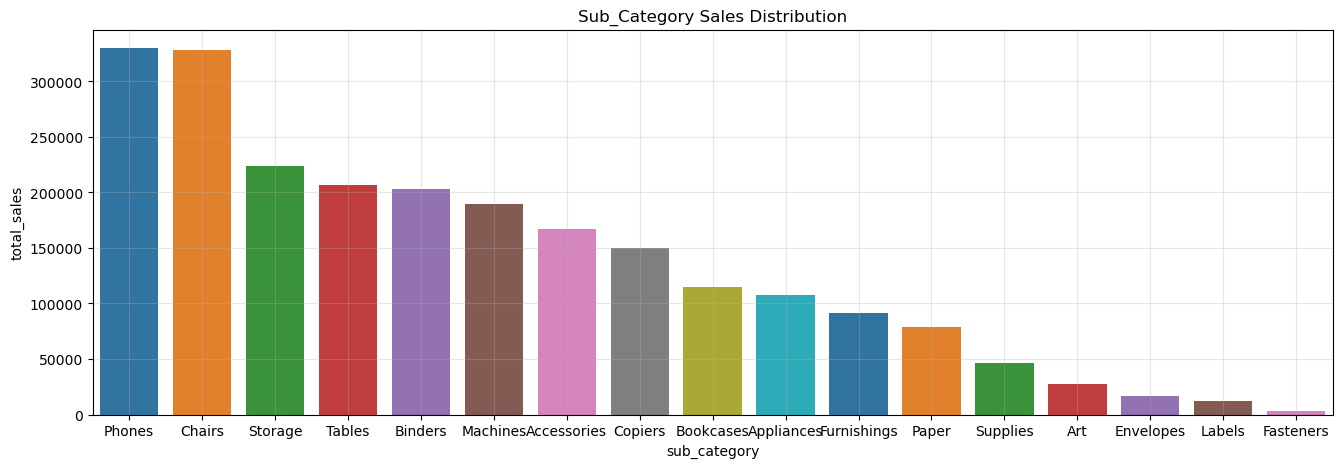

In [5]:
query="""
   select sub_category , sum(sales) as total_sales
   from [dbo].[Superstore]
   group by sub_category 
   order by total_sales desc
"""
Region_sales=pd.read_sql_query(query,engine)
Region_sales
plt.figure(figsize=(16,5))
sns.barplot(data=Region_sales,x='sub_category',y='total_sales',palette='tab10')
plt.grid(True,alpha=0.3)
plt.title('Sub_Category Sales Distribution')

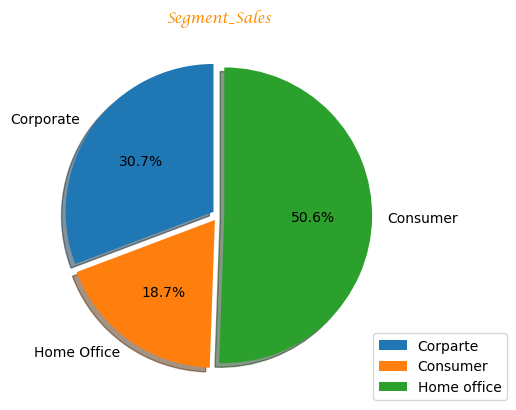

In [ ]:

query="""
   select segment , sum(sales) as total_sales
   from [dbo].[Superstore]
   group by segment
"""
Segment_Sales=pd.read_sql_query(query,engine)

ax=Segment_Sales.plot.pie(y='total_sales',labels=Segment_Sales['segment'],explode=[0.04,0.04,0.04],autopct='%1.1f%%',shadow=True,startangle=90); 
ax.set_title(label = "Segment_Sales", fontsize = 50,color='DarkOrange',font='Lucida Calligraphy'); 
plt.legend(labels=['Corparte','Consumer','Home office'],loc='upper center',bbox_to_anchor=(1.1,0.2)) 
plt.axis('off'); 


<Axes: >

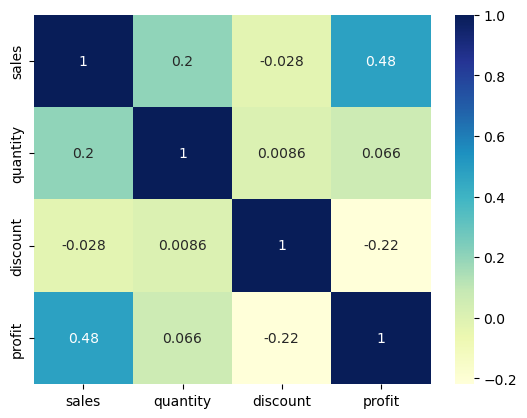

In [ ]:
query="""
   select sales , quantity,discount,profit
   from [dbo].[Superstore]
"""
Segment_Sales=pd.read_sql_query(query,engine)

corr2=Segment_Sales.corr()
sns.heatmap(corr2,xticklabels=Segment_Sales.columns,yticklabels=Segment_Sales.columns,cmap='YlGnBu',annot=True)